# RFE-CV Pipeline for feature selection
## Author: Shehbeel Arif

In [2]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv('pbta_mirna_tdata_v2.csv')
df

,Sample_ID,class,let-7a-2-3p,let-7a-3p,let-7a-5p,let-7b-5p,let-7c-3p,let-7c-5p,let-7d-3p,let-7d-5p,...,miR-944,miR-95-3p,miR-95-5p,miR-9-5p,miR-96-3p,miR-96-5p,miR-98-3p,miR-99a-5p,miR-99b-3p,miR-99b-5p
0,104-7316-2187_1,ATRT,54,142,52379,21782,216,35044,1729,19661,...,2,165,7,25001,14,1853,10,35498,422,10995
1,104-7316-122_1,ATRT,136,109,39346,10494,38,16308,2132,20500,...,34,51,35,1840,46,144,20,9680,443,7100
2,104-7316-2186_1,ATRT,13,74,39079,16633,159,30219,1614,13793,...,3,27,6,5624,1,54,3,36509,312,7834
3,104-7316-2933_1,ATRT,28,64,19514,5273,38,9328,1003,10016,...,2,307,3,4800,6,3818,3,9431,431,9542
4,104-7316-1771_1,ATRT,144,92,69964,20807,245,43025,1101,16204,...,1,1907,0,94839,0,293,8,69583,375,11645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,112-7316-2169_1,Medulloblastoma,11,43,120835,51749,213,83111,288,9561,...,0,60,2,97559,6,3395,2,85897,130,3151
253,112-7316-306_1,Medulloblastoma,10,62,156348,68643,251,112690,784,16713,...,0,416,0,237747,0,600,3,129015,288,7881
254,112-7316-1772_1,Medulloblastoma,103,46,159176,77675,45,82063,3781,24020,...,1,1157,0,145363,13,14861,0,62217,528,16372
255,112-7316-2986_1,Medulloblastoma,3,51,209309,59958,105,84189,720,13809,...,4,90,0,219567,72,59528,2,60116,323,9093


---

## Data Preprocessing

In [4]:
# Drop Sample ID column
_df = df.drop(['Sample_ID'], axis=1)

# Split the dataset into training data and labels
X = _df.loc[:, _df.columns != 'class'].values
y = _df.loc[:, _df.columns == 'class'].values.ravel()

# Sanity check
print(X[:5])
print(y[:5])

[[   54   142 52379 ... 35498   422 10995]
 [  136   109 39346 ...  9680   443  7100]
 [   13    74 39079 ... 36509   312  7834]
 [   28    64 19514 ...  9431   431  9542]
 [  144    92 69964 ... 69583   375 11645]]
['ATRT' 'ATRT' 'ATRT' 'ATRT' 'ATRT']


In [5]:
columns = df.columns.to_list()
features = columns[2:]

---

## Recursive Feature Elimination

## RFE to Find Top 100 Best Features

In [5]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

selector = RFE(RandomForestClassifier(), n_features_to_select=100, step=1)
selector = selector.fit(X, y)

In [25]:
feat_rank_df = pd.DataFrame(selector.ranking_, index=features, columns=['Rank']).sort_values(by='Rank', ascending=True)
#feat_rank_df.to_csv('pbta_rfe_selected_features.csv')

In [37]:
new_cols = ['Sample_ID', 'class'] + feat_rank_df[feat_rank_df['Rank']==1].index.to_list()
df[new_cols].head()
#df[new_cols].to_csv('pbta_rfe_selected_features_df.csv')

,Sample_ID,class,miR-30a-5p,miR-429,miR-519a-3p,miR-212-3p,miR-542-5p,miR-329-3p,miR-424-3p,miR-216a-3p,...,miR-30b-5p,miR-4636,miR-31-5p,miR-487a-3p,miR-183-5p,miR-3180-3p,miR-2681-3p,miR-488-5p,miR-25-3p,miR-25-5p
0,104-7316-2187_1,ATRT,12089,28,24,222,52,145,121,20,...,10603,34,26035,80,504,741,17,3,7655,46
1,104-7316-122_1,ATRT,5877,40,66,1697,95,498,453,45,...,9955,30,54,230,43,930,22,29,9881,49
2,104-7316-2186_1,ATRT,26044,7,20,116,8,58,22,15,...,20033,10,671,31,17,380,3,2,7561,33
3,104-7316-2933_1,ATRT,23123,4,200,130,59,105,182,28,...,27993,4,84,102,1422,907,0,1,18862,130
4,104-7316-1771_1,ATRT,13126,3,0,219,14,1800,35,3,...,20901,3,19,214,86,298,21,0,16869,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,112-7316-2169_1,Medulloblastoma,5682,1,0,55,15,148,37,69,...,11228,7,35,44,889,142,2,3,29439,138
253,112-7316-306_1,Medulloblastoma,10771,9,0,215,34,1151,35,128,...,20366,5,106,366,199,133,9,59,45241,156
254,112-7316-1772_1,Medulloblastoma,30804,21,10,234,34,2026,96,78,...,40572,17,475,784,2370,238,39,82,19870,63
255,112-7316-2986_1,Medulloblastoma,9086,2,2,152,11,134,41,357,...,39296,1,102,51,19278,105,8,70,56368,195


---

## RFE to Find Top 50 Best Features

In [55]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

fifty_selector = RFE(RandomForestClassifier(), n_features_to_select=50, step=1)
fifty_selector = fifty_selector.fit(X, y)

In [58]:
fifty_feat_rank_df = pd.DataFrame(fifty_selector.ranking_, index=features, columns=['Rank']).sort_values(by='Rank', ascending=True)
#fifty_feat_rank_df.to_csv('pbta_rfe_50_selected_features.csv')

In [59]:
new_cols = ['Sample_ID', 'class'] + fifty_feat_rank_df[fifty_feat_rank_df['Rank']==1].index.to_list()
df[new_cols].head()
#df[new_cols].to_csv('pbta_rfe_50_selected_features_df.csv')

---

## RFE to Find Top 25 Best Features

In [8]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

twentfive_selector = RFE(RandomForestClassifier(), n_features_to_select=25, step=1)
twentfive_selector = twentfive_selector.fit(X, y)

In [9]:
twentfive_feat_rank_df = pd.DataFrame(twentfive_selector.ranking_, index=features, columns=['Rank']).sort_values(by='Rank', ascending=True)
twentfive_feat_rank_df.to_csv('pbta_rfe_25_selected_features.csv')

In [10]:
new_cols = ['Sample_ID', 'class'] + twentfive_feat_rank_df[twentfive_feat_rank_df['Rank']==1].index.to_list()
df[new_cols].head()
df[new_cols].to_csv('pbta_rfe_25_selected_features_df.csv')

---

## RFE to Find Top 10 Best Features

In [11]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

ten_selector = RFE(RandomForestClassifier(), n_features_to_select=10, step=1)
ten_selector = ten_selector.fit(X, y)

In [12]:
ten_feat_rank_df = pd.DataFrame(ten_selector.ranking_, index=features, columns=['Rank']).sort_values(by='Rank', ascending=True)
ten_feat_rank_df.to_csv('pbta_rfe_10_selected_features.csv')

In [13]:
new_cols = ['Sample_ID', 'class'] + ten_feat_rank_df[ten_feat_rank_df['Rank']==1].index.to_list()
df[new_cols].head()
df[new_cols].to_csv('pbta_rfe_10_selected_features_df.csv')

---

## Automated Feature Selection

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFECV
import numpy as np
from sklearn.ensemble import RandomForestClassifier

rfecv = RFECV(estimator=RandomForestClassifier())
model = RandomForestClassifier()

pipeline = Pipeline([('Feature Selection', rfecv), ('Model', model)])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=123)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
np.mean(n_scores)

0.8226461538461539

In [43]:
pipeline.fit(X, y)

Pipeline(steps=[('Feature Selection',
                 RFECV(estimator=RandomForestClassifier())),
                ('Model', RandomForestClassifier())])

In [44]:
print('Optimal number of features : %d' % rfecv.n_features_)

Optimal number of features : 324


In [47]:
rfecv.support_
#rfecv_df = pd.DataFrame(rfecv.ranking_,index=X.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)
rfecv_df = pd.DataFrame(rfecv.ranking_,index=features,columns=['Rank']).sort_values(by='Rank',ascending=True)

rfecv_df.head()

,Rank
miR-92b-3p,1
miR-22-3p,1
miR-223-5p,1
miR-223-3p,1
miR-222-5p,1


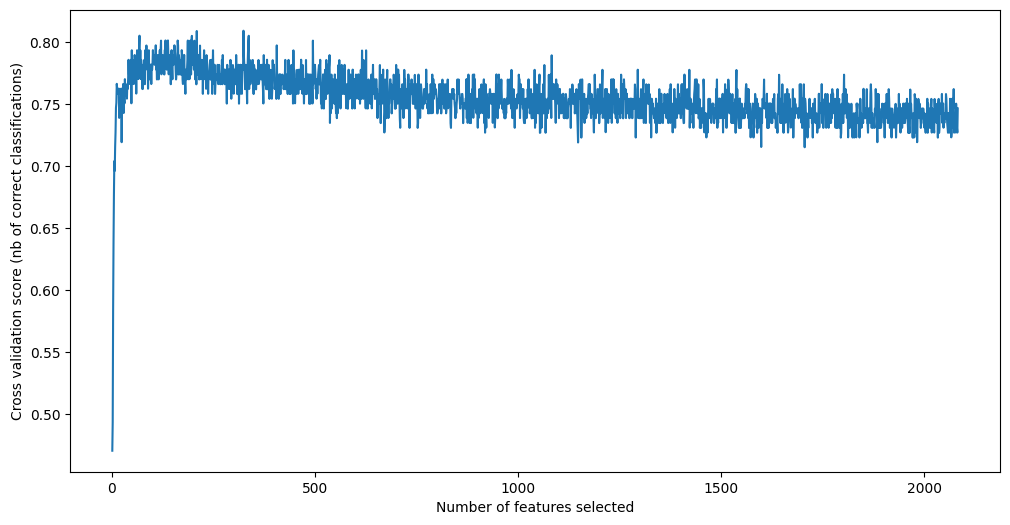

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.xlabel('Number of features selected')
plt.ylabel('Cross validation score (nb of correct classifications)')
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [50]:
rfecv_rank_df = pd.DataFrame(rfecv.ranking_, index=features, columns=['Rank']).sort_values(by='Rank', ascending=True)
rfecv_rank_df.head()
#rfecv_rank_df.to_csv('pbta_rfecv_selected_features.csv')

In [51]:
rfecv_cols = ['Sample_ID', 'class'] + rfecv_rank_df[rfecv_rank_df['Rank']==1].index.to_list()
df[rfecv_cols]
#df[rfecv_cols].to_csv('pbta_rfecv_selected_features_df.csv')

---

## Overlap between Tumor-specific miRNAs Found

In [73]:
# MB LFC4 (8)
mb_de_mirnas = ['miR-217', 'miR-216b-5p', 'miR-216a-5p', 'miR-935', 'miR-31-5p', 'miR-135b-5p', 
                'miR-219a-2-3p', 'miR-124-3p']
# LGAT LFC3 (2)
lgat_de_mirnas = ['miR-4705', 'miR-375'] #'miR-219a-2-3p'

# GNG LFC2 (14) -12
gng_de_mirnas = ['miR-15b-3p','miR-139-5p', 'miR-139-3p', 'miR-770-5p', 'miR-21-5p', 
                'miR-138-2-3p', 'miR-873-5p', 'miR-490-5p', 'miR-433-3p', 'miR-383-5p',
                'miR-935', 'miR-138-5p', 'miR-135b-5p', 'miR-10b-5p'] 
                #miR−129−5p, miR−129−2−3p, miR−124−3p, 'miR−129−1−3p', 'miR−449b−5p', 'miR−96−5p', 'miR−219a−2−3p'

# EPN LFC4 (6)
epn_de_mirnas = ['miR-34c-5p', 'miR-34c-3p', 'miR-4423-5p', 'miR-4423-3p', 'miR-135a-5p', 'miR-137']

# CRANIO LFC5 (9)
cranio_de_mirnas = ['miR-141-3p', 'miR-205-5p', 'miR-200c-3p', 'miR-200b-3p', 'miR-200a-3p', 'miR-429',
                    'miR-141-5p', 'miR-200b-5p', 'miR-96-5p']

# ATRT LFC3 (2)
atrt_de_mirnas = ['miR-208b-3p', 'miR-335-3p']



In [79]:
print('MB DE miRNA overlap:')
print(list(set(rfecv_rank_df[rfecv_rank_df['Rank']==1].index.to_list()) & set(mb_de_mirnas)))
print('LGAT DE miRNA overlap:')
print(list(set(rfecv_rank_df[rfecv_rank_df['Rank']==1].index.to_list()) & set(lgat_de_mirnas)))
print('GNG DE miRNA overlap:')
print(list(set(rfecv_rank_df[rfecv_rank_df['Rank']==1].index.to_list()) & set(gng_de_mirnas)))
print('Epn DE miRNA overlap:')
print(list(set(rfecv_rank_df[rfecv_rank_df['Rank']==1].index.to_list()) & set(epn_de_mirnas)))
print('Cranio DE miRNA overlap:')
print(list(set(rfecv_rank_df[rfecv_rank_df['Rank']==1].index.to_list()) & set(cranio_de_mirnas)))
print('ATRT DE miRNA overlap:')
print(list(set(rfecv_rank_df[rfecv_rank_df['Rank']==1].index.to_list()) & set(atrt_de_mirnas)))

MB DE miRNA overlap:
['miR-124-3p', 'miR-216b-5p', 'miR-135b-5p', 'miR-217', 'miR-219a-2-3p', 'miR-935', 'miR-216a-5p', 'miR-31-5p']
LGAT DE miRNA overlap:
['miR-375', 'miR-4705']
GNG DE miRNA overlap:
['miR-135b-5p', 'miR-139-5p', 'miR-15b-3p', 'miR-139-3p', 'miR-10b-5p', 'miR-490-5p', 'miR-935', 'miR-138-5p', 'miR-873-5p', 'miR-138-2-3p', 'miR-770-5p', 'miR-433-3p']
Epn DE miRNA overlap:
['miR-135a-5p', 'miR-137', 'miR-4423-5p', 'miR-4423-3p', 'miR-34c-5p', 'miR-34c-3p']
Cranio DE miRNA overlap:
['miR-200c-3p', 'miR-429', 'miR-200b-5p', 'miR-200b-3p', 'miR-141-5p', 'miR-141-3p', 'miR-96-5p', 'miR-200a-3p', 'miR-205-5p']
ATRT DE miRNA overlap:
['miR-335-3p', 'miR-208b-3p']


In [81]:
overlapped_mirnas = list(set(rfecv_rank_df[rfecv_rank_df['Rank']==1].index.to_list()) & set(mb_de_mirnas)) + list(set(rfecv_rank_df[rfecv_rank_df['Rank']==1].index.to_list()) & set(lgat_de_mirnas)) + list(set(rfecv_rank_df[rfecv_rank_df['Rank']==1].index.to_list()) & set(gng_de_mirnas)) + list(set(rfecv_rank_df[rfecv_rank_df['Rank']==1].index.to_list()) & set(epn_de_mirnas)) + list(set(rfecv_rank_df[rfecv_rank_df['Rank']==1].index.to_list()) & set(cranio_de_mirnas)) + list(set(rfecv_rank_df[rfecv_rank_df['Rank']==1].index.to_list()) & set(atrt_de_mirnas))
overlapped_mirnas

['miR-124-3p',
 'miR-216b-5p',
 'miR-135b-5p',
 'miR-217',
 'miR-219a-2-3p',
 'miR-935',
 'miR-216a-5p',
 'miR-31-5p',
 'miR-375',
 'miR-4705',
 'miR-135b-5p',
 'miR-139-5p',
 'miR-15b-3p',
 'miR-139-3p',
 'miR-10b-5p',
 'miR-490-5p',
 'miR-935',
 'miR-138-5p',
 'miR-873-5p',
 'miR-138-2-3p',
 'miR-770-5p',
 'miR-433-3p',
 'miR-135a-5p',
 'miR-137',
 'miR-4423-5p',
 'miR-4423-3p',
 'miR-34c-5p',
 'miR-34c-3p',
 'miR-200c-3p',
 'miR-429',
 'miR-200b-5p',
 'miR-200b-3p',
 'miR-141-5p',
 'miR-141-3p',
 'miR-96-5p',
 'miR-200a-3p',
 'miR-205-5p',
 'miR-335-3p',
 'miR-208b-3p']

In [84]:
overlap_cols = ['Sample_ID', 'class'] + overlapped_mirnas
df[overlap_cols]
#df[overlap_cols].to_csv('pbta_rfecv_overlap_features_df.csv')

,Sample_ID,class,miR-124-3p,miR-216b-5p,miR-135b-5p,miR-217,miR-219a-2-3p,miR-935,miR-216a-5p,miR-31-5p,...,miR-429,miR-200b-5p,miR-200b-3p,miR-141-5p,miR-141-3p,miR-96-5p,miR-200a-3p,miR-205-5p,miR-335-3p,miR-208b-3p
0,104-7316-2187_1,ATRT,1238,21,30414,36,26,49,35,26035,...,28,6,64,14,159,1853,71,16,29,16
1,104-7316-122_1,ATRT,146,36,44,61,39,64,67,54,...,40,34,36,33,88,144,42,33,52,57
2,104-7316-2186_1,ATRT,7096,50,10114,245,3,28,1112,671,...,7,0,51,4,13,54,33,25,90,6
3,104-7316-2933_1,ATRT,3856,2378,1682,1933,1785,118,4433,84,...,4,1,35,6,1253,3818,29,119,74,0
4,104-7316-1771_1,ATRT,58235,13,3252,8,9,1288,7,19,...,3,0,12,2,42,293,18,5,514,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,112-7316-2169_1,Medulloblastoma,64453,6415,19601,4185,1,7,8537,35,...,1,0,10,0,22,3395,4,0,1,13
253,112-7316-306_1,Medulloblastoma,91075,8604,66833,5216,28,13,15433,106,...,9,0,14,2,57,600,24,21,7,84
254,112-7316-1772_1,Medulloblastoma,117292,5732,1469,3878,27070,237,8010,475,...,21,12,209,2,116,14861,303,9,4,13
255,112-7316-2986_1,Medulloblastoma,127176,25970,57890,17562,13,10,38727,102,...,2,0,6,2,61,59528,5,12,5,97


---